# [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

## Data Description

* row : passenger
* col : features like passengers`s gender and class
* target : 'ground truth'
* Data Link : [Titanic](https://www.kaggle.com/c/titanic)
* 필사 Link : [EDA To Prediction(DieTanic)](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook)

## Exploratory Data Analysis(EDA)

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt style 중 사용 가능한 것들을 출력해 줍니다.

In [2]:
print(plt.style.available)
plt.style.use('seaborn-dark')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Load Data

In [3]:
train_path  = 'data/train.csv'
test_path  = 'data/test.csv'
sample_path = 'data/gender_submission.csv'
data = pd.read_csv(train_path)
print(data.shape)
data.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


892행, 12열 입니다.

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### How many survived?

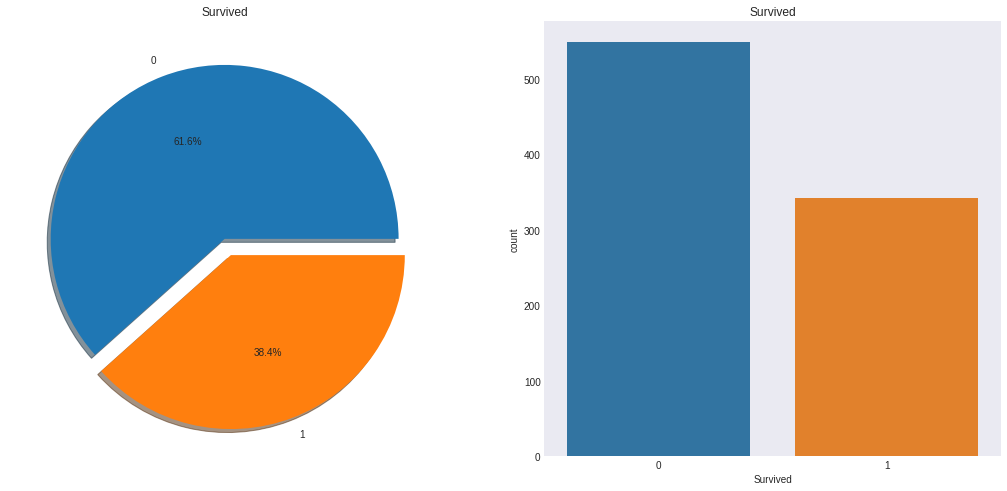

In [5]:
fig, axes = plt.subplots(1,2,figsize= (18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[0], shadow = True)
axes[0].set_title('Survived')
axes[0].set_ylabel('')
sns.countplot('Survived', data=data, ax = axes[1])
axes[1].set_title('Survived')
plt.show()

In [6]:
# Study
print(data['Survived'].value_counts())
print(type(data['Survived'].value_counts()))
print(data['Survived'].value_counts().index)
print(data['Survived'].value_counts().values)
print(data['Survived'].count())

0    549
1    342
Name: Survived, dtype: int64
<class 'pandas.core.series.Series'>
Int64Index([0, 1], dtype='int64')
[549 342]
891


Series의 value_counts()의 type은 여전히 Series 입니다.  
이는 해당 value 값이 index로 들어가고 counts 가 value로 들어간 Series 형태이기 때문입니다.

변화 전 axes.shape : (2, 2)
변화 후 axes.shape : (4,)


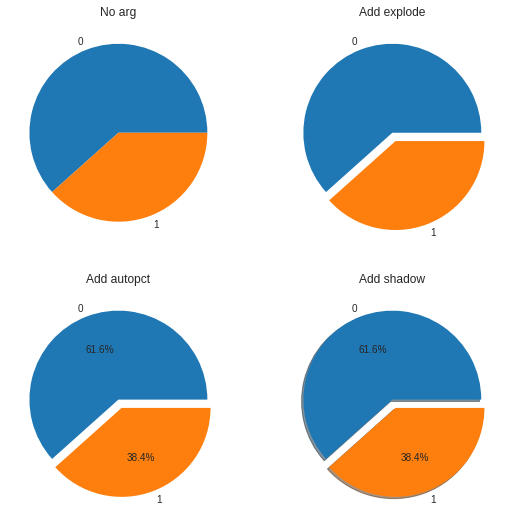

In [7]:
# Study
title_name = ['No arg','Add explode','Add autopct','Add shadow']
fig, axes = plt.subplots(2,2,figsize= (9,9))
print('변화 전 axes.shape :', axes.shape)
axes = axes.flatten()
print('변화 후 axes.shape :', axes.shape)
data['Survived'].value_counts().plot.pie(ax = axes[0])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax = axes[1])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[2])
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%',ax = axes[3], shadow = True)

for i, ax in enumerate(axes):
    ax.set_ylabel('')
    ax.set_title(title_name[i])

plt.show()

# 넣어주는 인자값을 따로 가져와서 title로 만들고자 했었으나 불가능
# 퍼실님 tip : 딕셔너리 형태로 함수의 argument를 넣을 수 있다. 매개변수 : 인자
# 넣을 때는 **딕셔너리이름
# dicts = {'explode':[0,0.1], 'autopct'  : '%1.1f%%'}
# data['Survived'].value_counts().plot.pie(**dicts[:1],ax = axes[0])
# data['Survived'].value_counts().plot.pie(**dicts,ax = axes[0])


* 작성 방법
  1. 그래프들의 제목들을 리스트로 저장합니다.
  2. 4개의 그래프를 위해 공간 (2,2)를 subplots로 지정합니다.
  3. iterative 하게 사용하기 위해 ax 를 flatten 합니다. [numpy flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)
  4. flatten 해줬으므로 1차원으로 ax로 설정합니다.(하지만 그래프는 여전히 2,2 로 나옵니다)
  5. 그래프마다 인자값을 다르게해서 넣어줍니다.
  6. enumerate를 사용해서 ax를 순차적으로 접근하여 전체 그래프의 ylabel을 비워줍니다.
  7. enumerate를 사용해서 ax의 index 값을 제목 리스트의 index로 활용합니다.

In [8]:
print(axes)
print(axes[0])
print(type(axes))
print(type(axes[0]))

[<AxesSubplot:title={'center':'No arg'}>
 <AxesSubplot:title={'center':'Add explode'}>
 <AxesSubplot:title={'center':'Add autopct'}>
 <AxesSubplot:title={'center':'Add shadow'}>]
AxesSubplot(0.129545,0.536818;0.343182x0.343182)
<class 'numpy.ndarray'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


* ax를 2차원 배열로 만들어주게되면 ndarray로 됩니다.  
(물론 내부 데이터는 AxeSubplot 입니다.)
* 지금은 flatten을 적용해서 shape가 (2,2) 에서 (4,) 으로 변합니다.  

이제 그래프에 들어간 파라미터들을 알아봅니다.  
[pandas pie](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)  
[matplotlib pie](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)

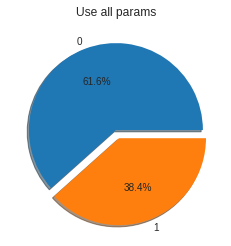

In [9]:
fig, axes = plt.subplots()
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct = '%1.1f%%', shadow = True)
plt.title('Use all params')
plt.ylabel('')
plt.show()

* explode : 파이 사이 빈 간격을 만들어줍니다.
* autopct : 파이 공간 내부에 숫자를 적어줍니다. 표현식을 통해 소수점 몇 자리로 표현할 수 나타낼 수 있습니다.
* shadow : 그림자.

pandas 의 pie 는 matplotlib 의 pie의 기능을 가져온 것 입니다.

### Analysing The Features

* Sex -> Categorical Feature
* 성별은 카테고리형 특징입니다.(not numeric)

In [10]:
data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

* [groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)를 통해 Sex 와 Survived의 그룹 별로 나누고 여러 계산 함수를 적용하여 결과를 하나로 합친 형태를 return합니다.
* 즉, return 되는 groupby object는 주로 비교 또는 계산에 사용됩니다.

In [11]:
data_group1 = data.groupby(['Sex','Survived'])
print("group size()\n", data_group1.size(),end = '\n\n')

group size()
 Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64



In [12]:
print("group sum()\n",data_group1.sum(),end = '\n\n')
print("group mean()\n",data_group1.mean())

group sum()
                  PassengerId  Pclass       Age  SibSp  Parch        Fare
Sex    Survived                                                         
female 0               35223     231   1603.00     98     84   1864.9752
       1              100120     447   5683.00    120    120  12101.6876
male   0              210189    1159  11382.50    206     97  10277.7447
       1               51854     220   2536.67     42     39   4449.5418

group mean()
                  PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1

In [13]:
print(data.groupby(['Sex','Survived'])['Survived'].count(),end = '\n\n')
print(data.groupby(['Sex','Survived'])['Sex'].count(),end = '\n\n')
print(data.groupby(['Sex','Survived']).count())

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Sex, dtype: int64

                 PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109  


따로 추가로 열을 지정해주지 않으면 해당 열이 아닌 다른 전체 열에 대한 count를 불러옵니다.


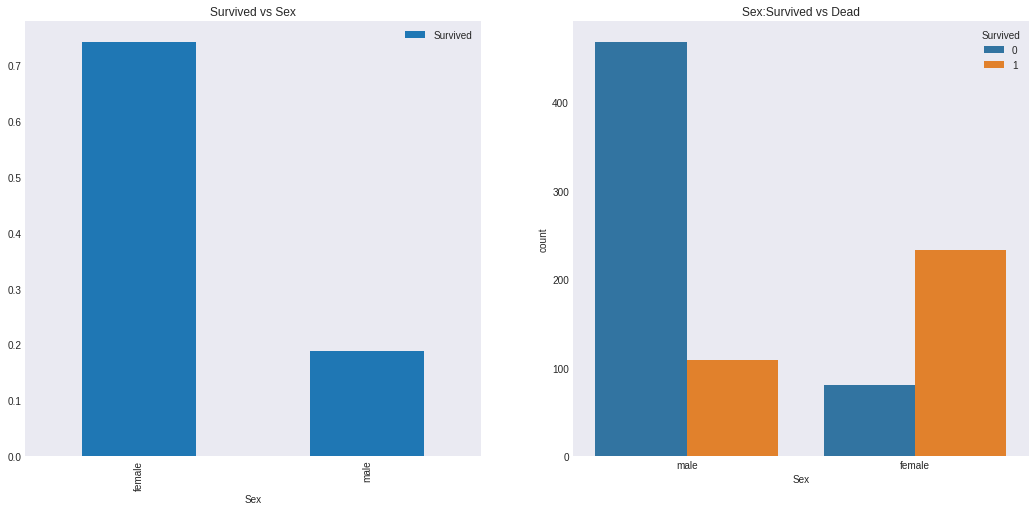

In [14]:
fig ,axes =plt.subplots(1, 2, figsize = (18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = axes[0])
axes[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data = data,ax = axes[1])
axes[1].set_title('Sex:Survived vs Dead')
plt.show()

* axes[0] 또는 axes[1]를 통해 그래프의 위치를 정해주었습니다.
* 초기에 subplots 에서 1,2를 했기 때문에 그래프는 1행 2열의 위치들을 가집니다.
* seaborn graph 에서는 Hue가 뭔지 몰라서 검색해보았습니다.
* [검색 결과](https://datascience.stackexchange.com/questions/46117/meaning-of-hue-in-seaborn-barplot)
* In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.
* seaborn 에서 hue 파라미터는 데이터프레임의 어떤 열이 컬러 인코딩에 사용되는지 결정하는 함수 입니다.
* 위 그래프에서 Sex를 x로 가지지만 hue를 Survived에 넣었기 때문에 Survived에 따라 색이 다르게 나오는 것 입니다.

### Pclass --> Ordinal Feature

display 함수를 통해 한 code cell에서 2개 이상의 DataFrame를 표시할 수 있습니다.

In [15]:
display(pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r'))
display(pd.crosstab(data.Pclass, data.Survived))

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


* [pandas crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)
* 2개 이상의 요인에 따라 간단한 교차표를 만듭니다.
* 교차표 : 두 개의 확률변수를 요약하여 그 연관성을 나타내느 표
* 코드에서는 Pclass(좌석 등급)과 Survived(생존자)의 연관성을 나타내었습니다.
* margin 값을 True로 둬서 요약합계를 구하게 하였습니다.
* 뒤의 style.background_gradient는 gradient style에 따라 배경을 바꿔주는 함수입니다.
* [pandas.io.formats.style.Styler.background_gradient](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

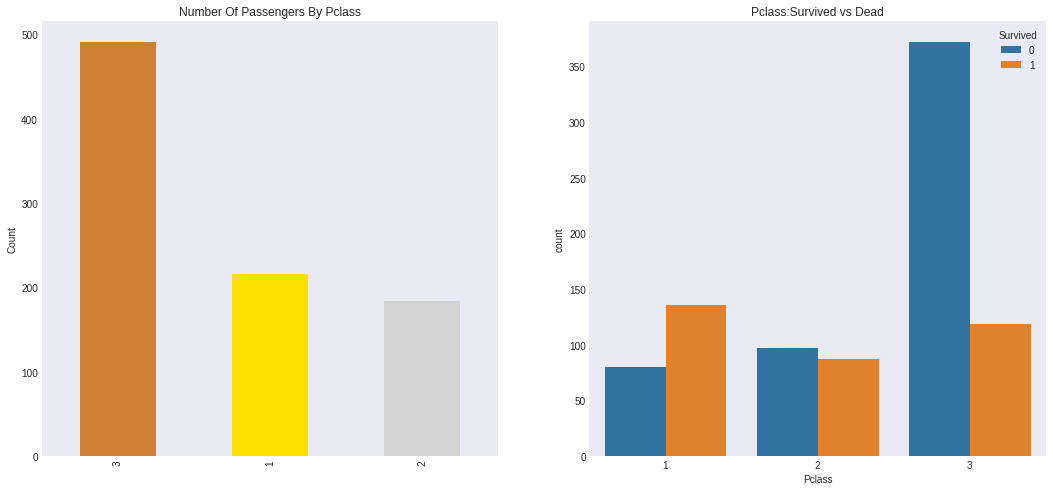

In [16]:
fig,axes = plt.subplots(1, 2, figsize = (18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax = axes[0])
axes[0].set_title('Number Of Passengers By Pclass')
axes[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data = data, ax = axes[1])
axes[1].set_title('Pclass:Survived vs Dead')
plt.show()

* Pclass의 개수를 세서 색을 지정하여 bar 그래프로 표현하였습니다.

In [17]:
pd.crosstab([data.Sex, data.Survived],data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

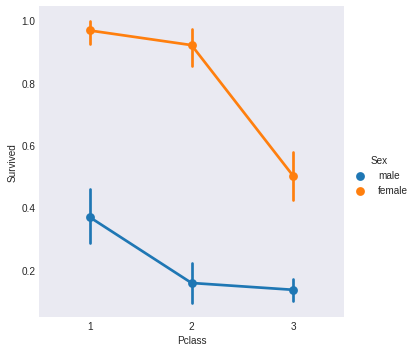

In [18]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

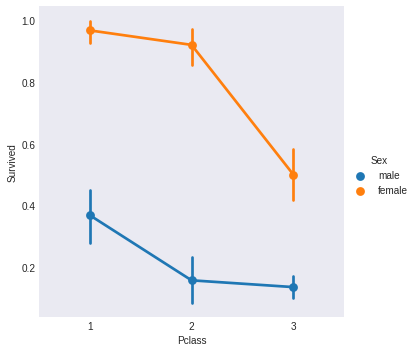

In [19]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, kind = 'point')
plt.show()

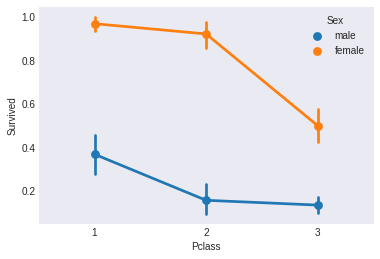

In [20]:
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)
plt.show()

* factorplot에 대한 seaborn 공식 docu를 찾지못하였습니다. 마우스를 올려보니 소멸 예징이니 catplot 쓰라는 군요.
* catplot의 kind를 point로 해주면 동일한 그래프가 나옵니다.
* 아니면 pointplot을 사용하시면 됩니다.(단 pointplot과 catplot의 파라미터가 다르니 사용시 주의바랍니다.)

### Age--> Continous Feature

In [21]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [22]:
data['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

* Age 열의 최대, 최소, 평균을 구합니다.

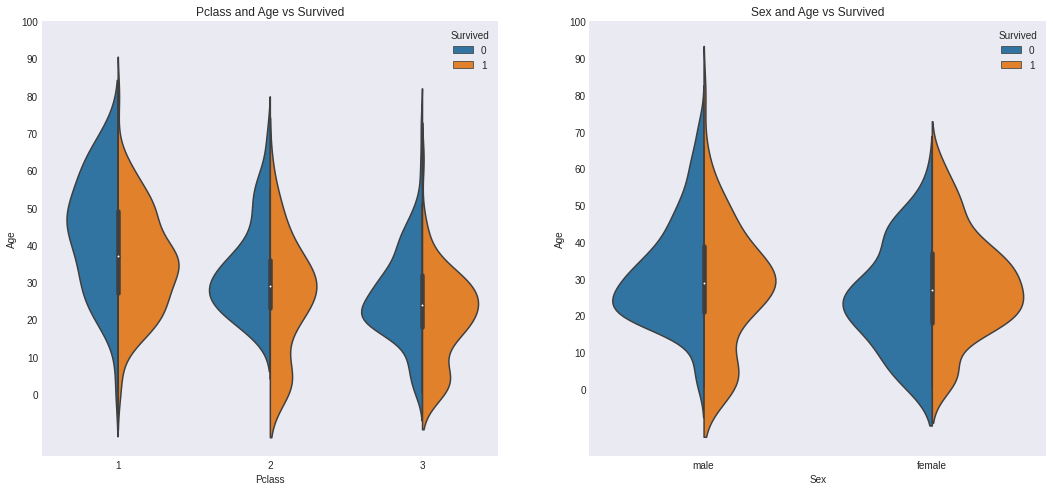

In [23]:
fig ,axes = plt.subplots(1, 2, figsize = (18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data = data, split = True, ax = axes[0])
axes[0].set_title('Pclass and Age vs Survived')
axes[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = axes[1])
axes[1].set_title('Sex and Age vs Survived')
axes[1].set_yticks(range(0,110,10))
plt.show()

* [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
* 커널 밀도 추정과 박스 플롯이 합쳐진 형태를 그려줍니다.
* 다중 분포를 쉽게 확인할 수 있지만 샘플 사이즈에 영향을 받습니다.
* split 파라미터를 통해서 바이올린을 나눠서 hue에 따라 두 개로 표현합니다.

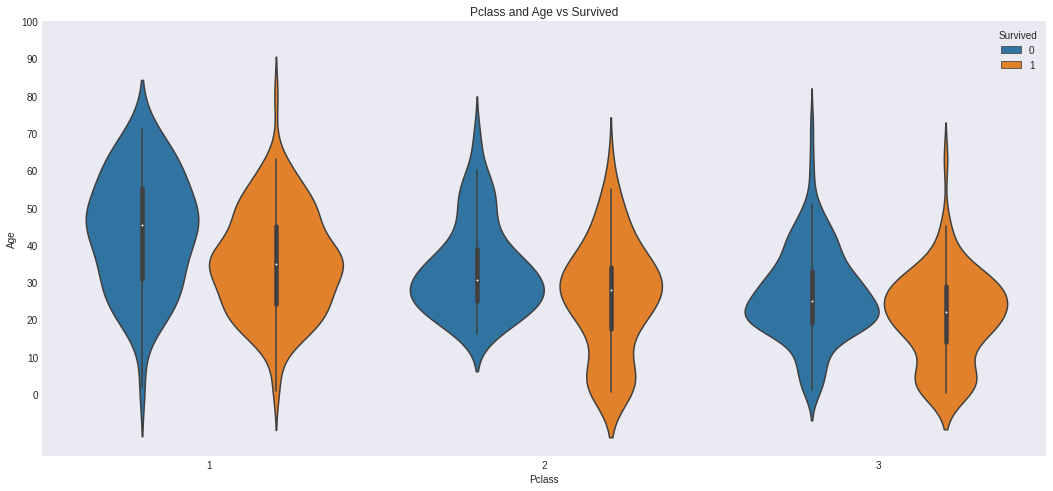

In [24]:
fig ,axes = plt.subplots( figsize = (18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data = data)
axes.set_title('Pclass and Age vs Survived')
axes.set_yticks(range(0,110,10))

plt.show()

In [25]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [26]:
print(data['Name'], data['Initial'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object 0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object


* 'a~z,A~Z + .' 형태를 가져와서 저장한다. 지칭대명사 같습니다.

In [27]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* T는 transpose

In [28]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

replace를 통해 해당 값을 다른 값으로 바꿔줍니다.(inplace를 적용하여 data의 값을 바꿔줍니다.)

In [29]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [30]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [31]:
data.Age.isnull().any()

False

* 새로 구한 Initial 값에 따라 Age에 NULL 값인 경우에 넣어줍니다.
* Age 열에 null 값이 없군요

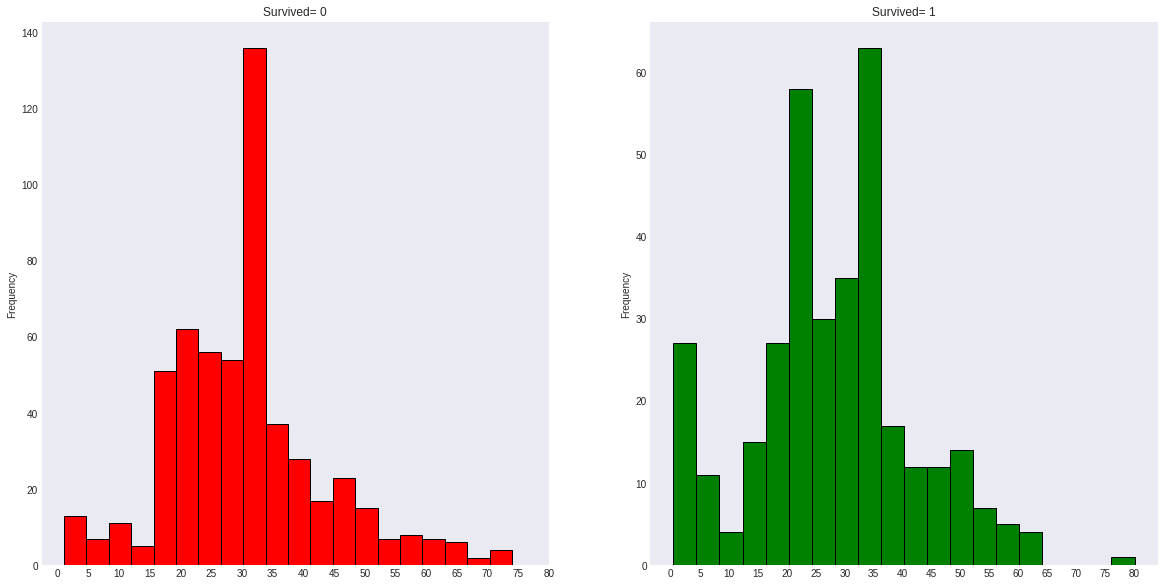

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))
data[data['Survived']==0].Age.plot.hist(ax = axes[0], bins=20, edgecolor = 'black', color = 'red')
axes[0].set_title('Survived= 0')
x1 = list(range(0,85,5))
axes[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = axes[1], color = 'green', bins = 20, edgecolor = 'black')
axes[1].set_title('Survived= 1')
x2=list(range(0,85,5))
axes[1].set_xticks(x2)
plt.show()

* [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)
* data[data['Survived']==0].Age.plot.hist(ax = axes[0], bins=20, edgecolor = 'black', color = 'red')
* data의 Survived 값이 0과 1인 경우에 data의 Age 값의 히스토그램을 출력합니다.(색을 다르게하여 구분)
* bins : 범위 내에서 동일한 길이의 바의 갯수를 말합니다.
* bins를 높이면 bar가 촘촘해지고 낮추면 bar가 넓어집니다.


### Observation

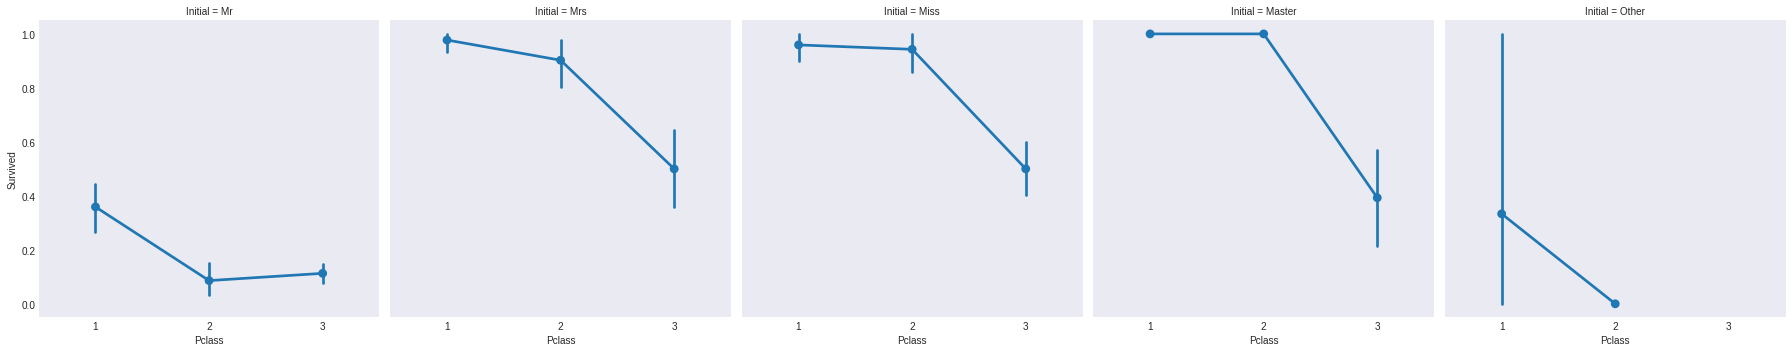

In [33]:
sns.factorplot('Pclass', 'Survived',col = 'Initial', data = data)
plt.show()

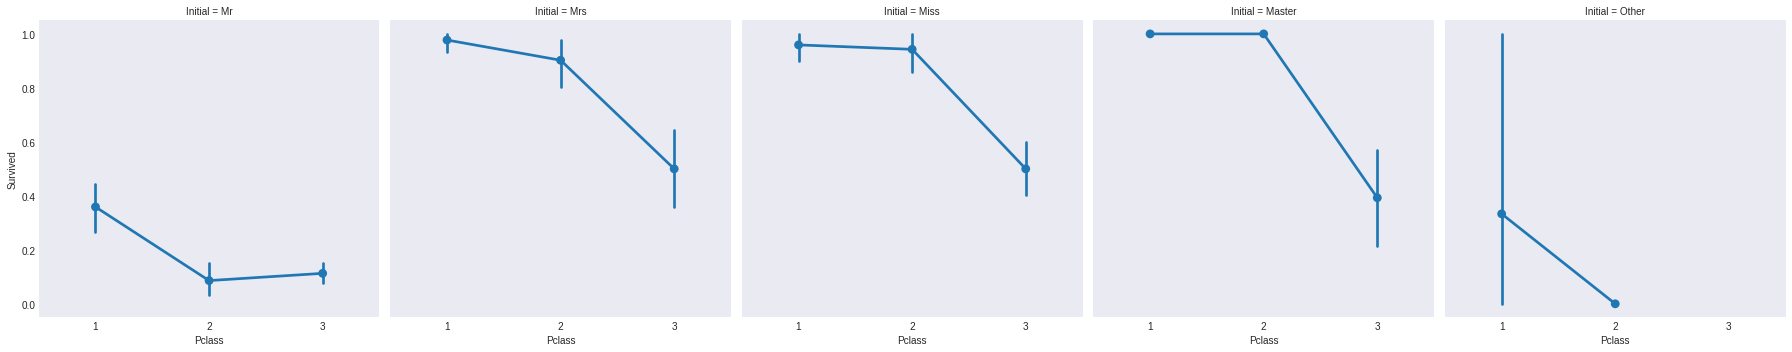

In [34]:
sns.catplot('Pclass', 'Survived', col = 'Initial', data = data, kind = 'point')
plt.show()

* catplot col 파라미터 : 카테고리형 변수들로 면을 나눠서 표현합니다.
* 해당 코드는 catplot을 사용하여 Pclass를 X축, Survived를 Y축, 으로 둔뒤 col에 Initial을 둬서
* Initial의 값들을 열로 표현하여 여러 개의 그래프를 나타내었습니다.

### Embarked--> Categorical Value

In [35]:
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

* 열을 2개씩 2세트로 잡아서 교차표를 만들었습니다.

### Chances for Survival by Port Of Embarkation

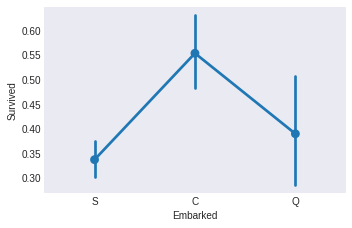

In [36]:
sns.factorplot('Embarked', 'Survived', data = data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

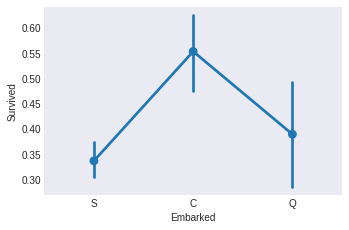

In [37]:
sns.catplot('Embarked', 'Survived', data = data, kind = 'point', height = 3.3, aspect = 1.5)

plt.show()

* plt.gcf() : 현재 figure를 가져옵니다.
* [catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html)의 height 파라미터로 높이를 받을 수 있고 aspect 파라미터로 aspect * height의 너비를 넣을 수 있다.

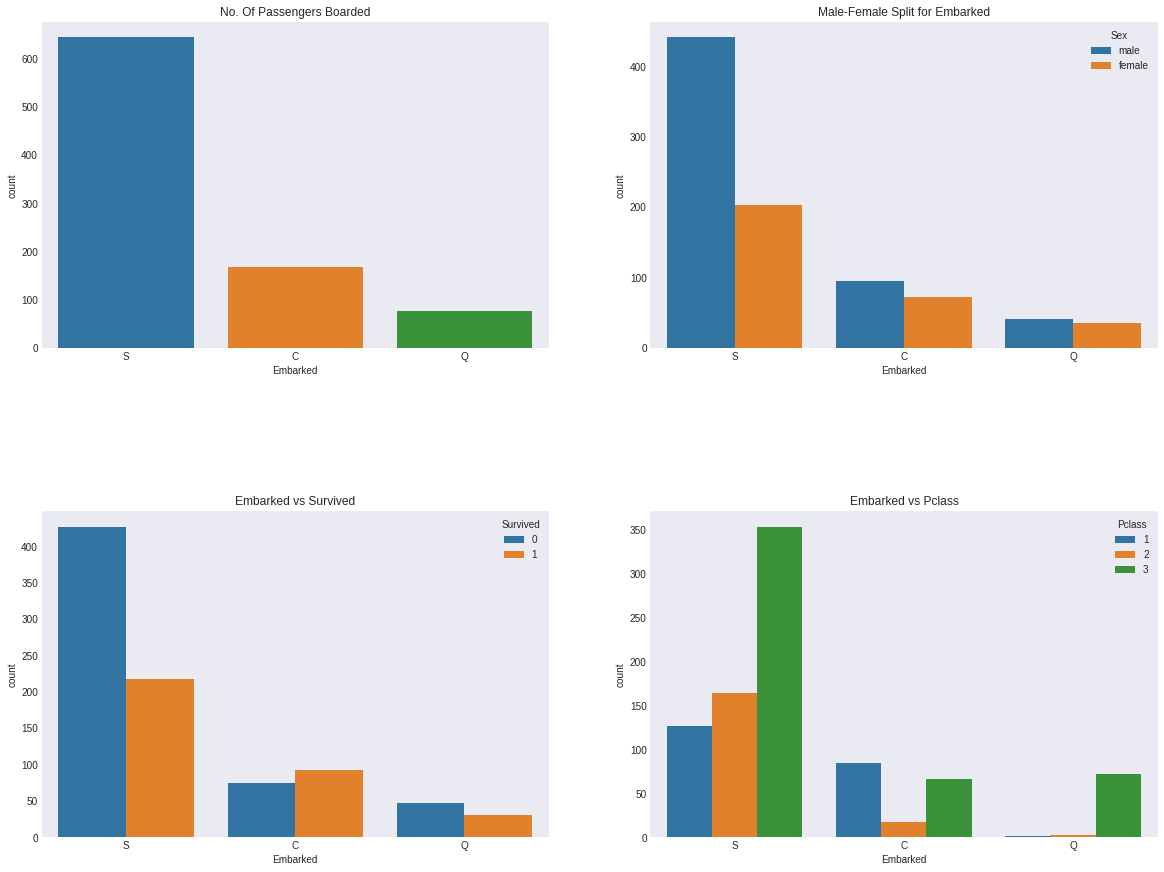

In [38]:
fig, axes = plt.subplots(2, 2, figsize = (20,15))
sns.countplot('Embarked', data = data, ax = axes[0,0])
axes[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = axes[0,1])
axes[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = axes[1,0])
axes[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = axes[1,1])
axes[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

* subplot으로 구역을 4개로 나누어서 counterplot을 여러 hue 값에 따라 출력하였습니다.
* [matplotlib.pyplot.subplots_adjust](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots_adjust.html)
* subplot 간의 간격을 조절합니다. wspace : subplot 간 너비의 padding, hspace : subplot 간 높이의 padding

### Observations

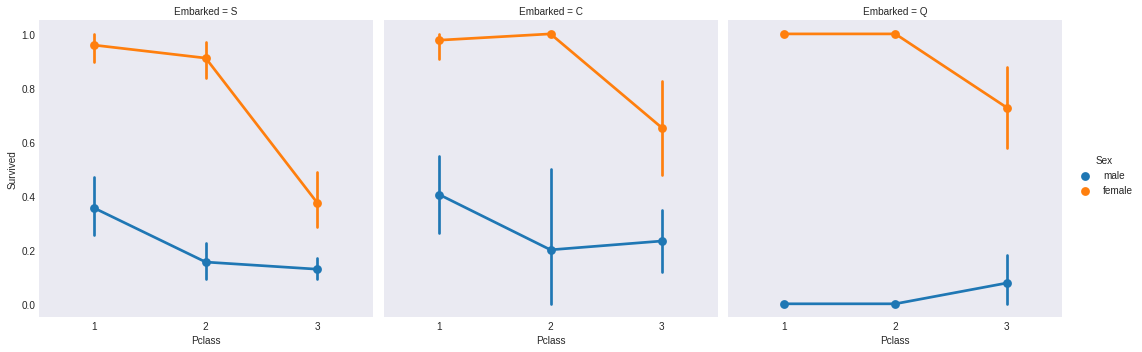

In [39]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

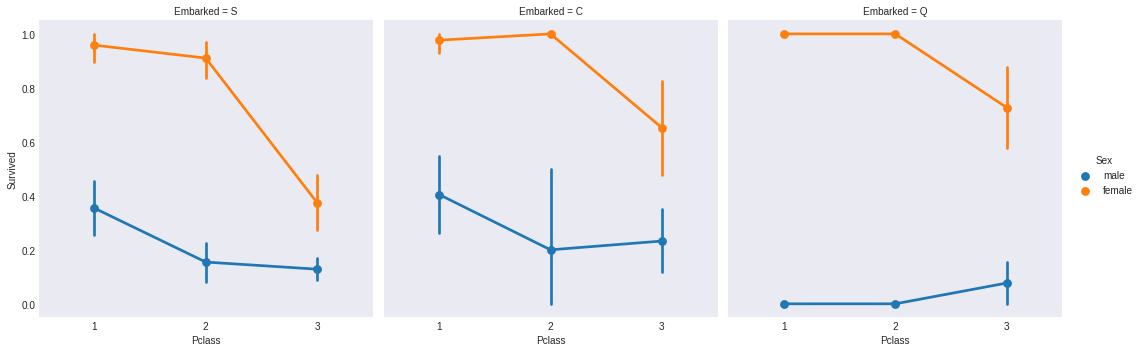

In [40]:
sns.catplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data, kind = 'point')
plt.show()

* Pclass 를 X축, Survived를 Y축 hue를 sex 열 방향 나열 값은 Embarked(승선항)에 따라 출력

### Filling Embarked NaN

In [41]:
print(set(data['Embarked']))

{nan, 'C', 'S', 'Q'}


In [42]:
data['Embarked'].fillna('S', inplace = True)
data.Embarked.isnull().any()

False

Embarked의 Null 값에 S를 값을 넣어줍니다.

### SibSip-->Discrete Feature

In [43]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


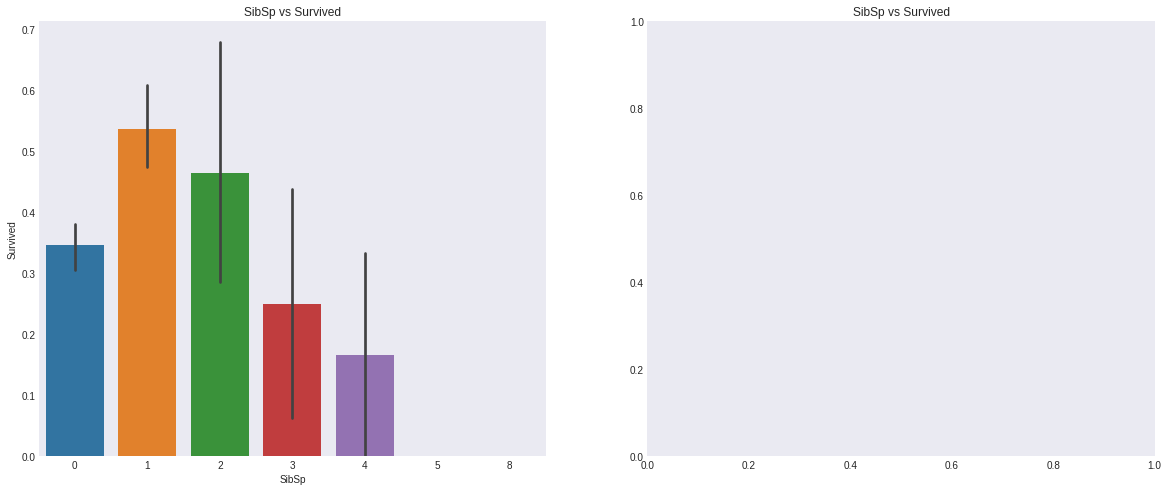

In [44]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

* 해당 코드를 입력해서 안나와서 그대로 복사 붙여넣기 했지만 역시 나오지 않았습니다.
* plt.close(a) : a 번째 figure 를 닫는 것 입니다.
* 만약 close 코드를 지우면 밑에 factorplot 그래프가 생깁니다.

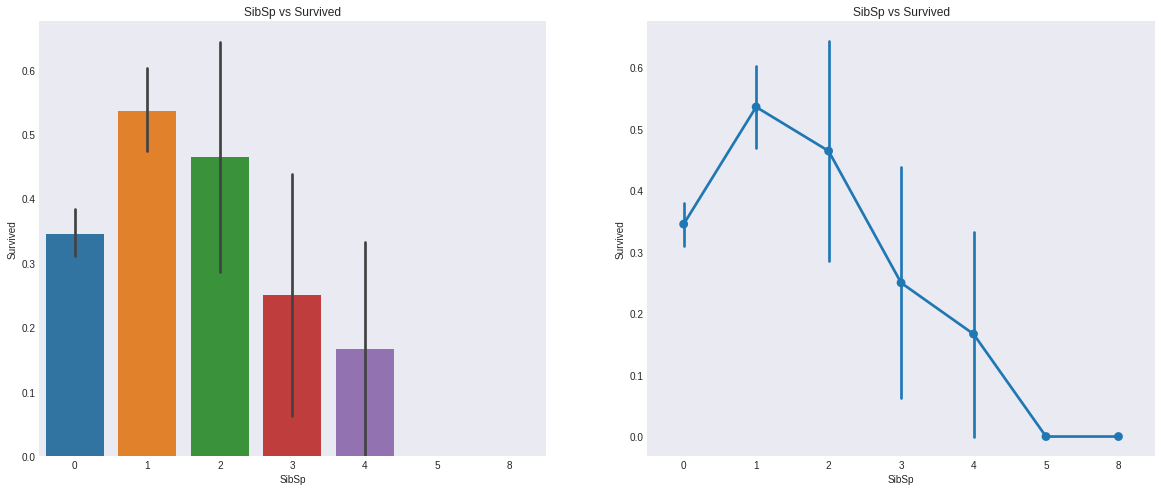

In [45]:
fig , axes = plt.subplots(1, 2, figsize = (20,8))
sns.barplot('SibSp', 'Survived', data = data, ax = axes[0])
axes[0].set_title('SibSp vs Survived')
sns.pointplot('SibSp', 'Survived', data = data, ax = axes[1])
axes[1].set_title('SibSp vs Survived')
plt.show()

그래서 factorplot 대신에 pointplot을 사용하였습니다.

In [46]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Parch

In [47]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Parch 는 부모 숫자입니다.

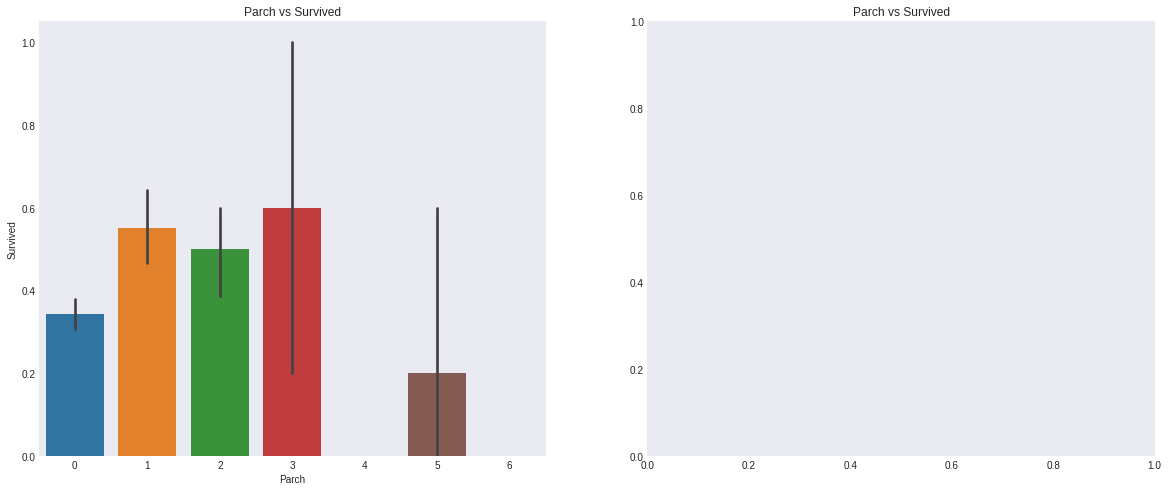

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data = data, ax = axes[0])
axes[0].set_title('Parch vs Survived')
sns.factorplot('Parch', 'Survived', data = data, ax = axes[1])
axes[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

또 안나오는 군요, pointplot으로 바꿔주겠습니다.

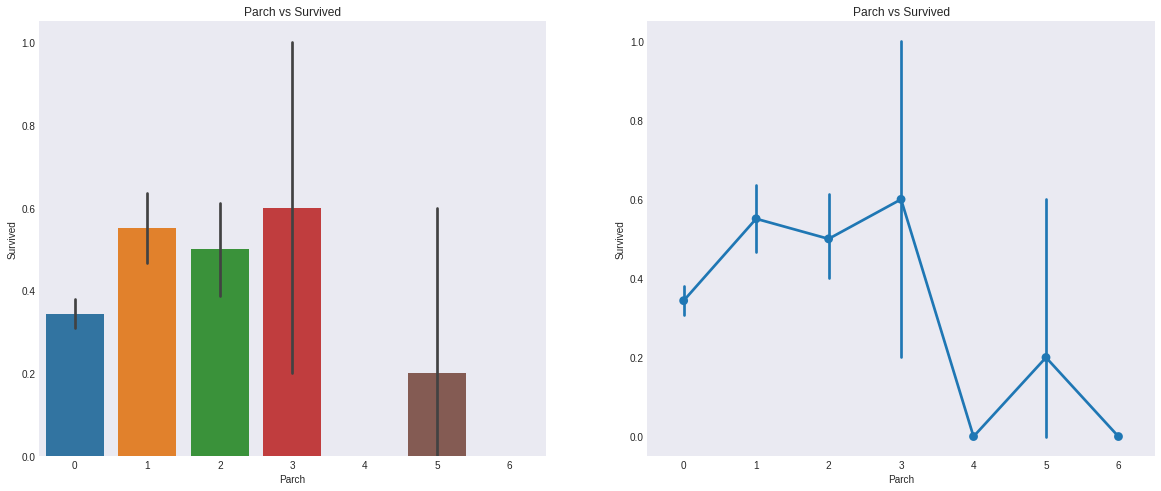

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(20,8))
sns.barplot('Parch', 'Survived', data = data, ax = axes[0])
axes[0].set_title('Parch vs Survived')
sns.pointplot('Parch', 'Survived', data = data, ax = axes[1])
axes[1].set_title('Parch vs Survived')
plt.show()

### Fare--> Continous Feature

In [50]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


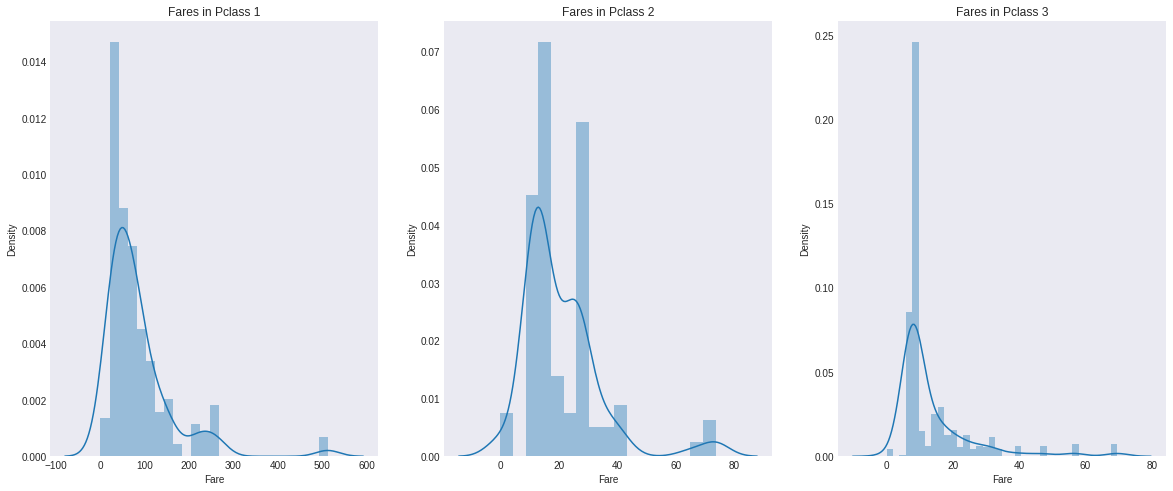

In [51]:
fig, axes = plt.subplots(1, 3, figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = axes[0])
axes[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare,ax = axes[1])
axes[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare,ax = axes[2])
axes[2].set_title('Fares in Pclass 3')
plt.show()

* [seaborn.distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)
* histogram과 kdeplot(), rugplot()을 합친 그래프라고 합니다.
* 곧 사라질 예정이니 histplot이랑 displot을 사용하길 권장합니다.
* rugplot은 [marginal distribution](https://en.wikipedia.org/wiki/Marginal_distribution) 주변분포에 따라 눈금를 그리는 그래프
* [주변분포](https://ko.wikipedia.org/wiki/%EC%A3%BC%EB%B3%80_%EB%B6%84%ED%8F%AC) : 부분 집합에 속한 확률 변수들의 확률 분포

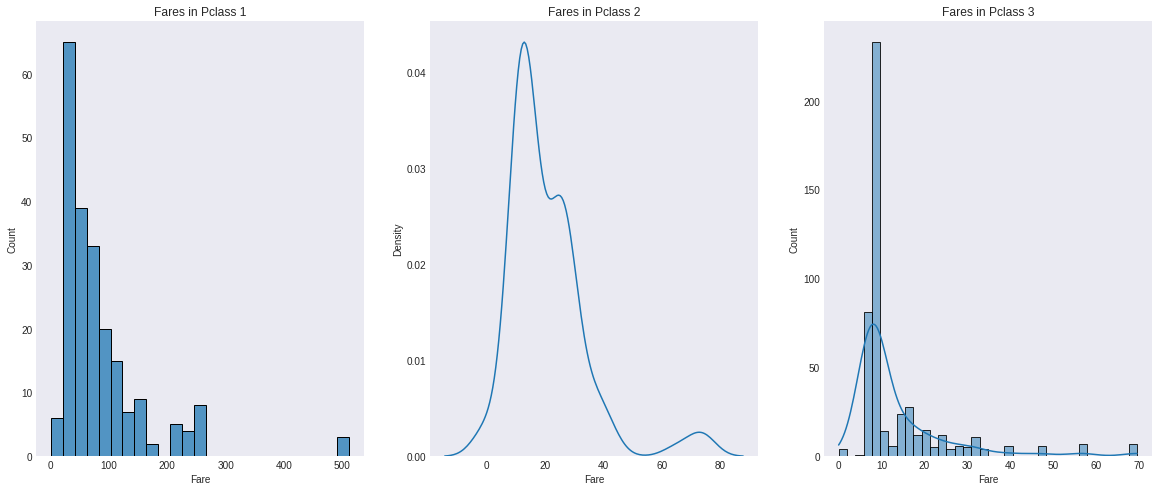

In [52]:
fig, axes = plt.subplots(1, 3, figsize = (20,8))
sns.histplot(data[data['Pclass'] == 1].Fare, ax = axes[0])
axes[0].set_title('Fares in Pclass 1')
sns.kdeplot(data[data['Pclass'] == 2].Fare,ax = axes[1])
axes[1].set_title('Fares in Pclass 2')
sns.histplot(data[data['Pclass'] == 3].Fare,ax = axes[2], kde = True)
axes[2].set_title('Fares in Pclass 3')
plt.show()

* 각각 histplot, kdeplot, histplot의 kde = True 그래프 입니다.
* distplot과 가장 유사하게 표현하려면 histplot 의 파라미터 kde = True 로 표현합니다.

### Correlation Between The Features

In [53]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


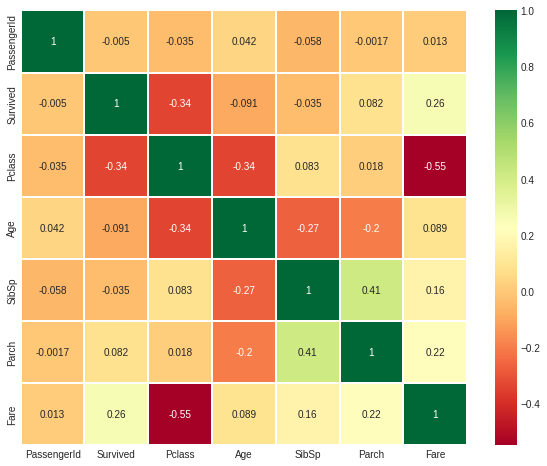

In [54]:
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 2)
# fig = plt.gcf()
# fig.set_size_inches(10, 8)
plt.show()

* [pandas.DataFrame.corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)
* NA/null 값을 제외한 열의 상관 관계를 계산합니다.
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
* heatmap : 데이터의 값을 컬러로 변환시켜 열 분포 형태로 보여줘서 시각적으로 잘 보이게 하는 기법
* annot = True 면 각 셀마다 값을 넣습니다, linewidths = 각 셀을 분할시키는 선의 너비(셀 사이의 거리)
* 크기 조정을 위한 코드를 새롭게 작성하였습니다.

## Part2: Feature Engineering and Data Cleaning

### Age_band

In [55]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
# data.head(2)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [56]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap = 'summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


to_frame() : series를 dataframe으로 바꿉니다.

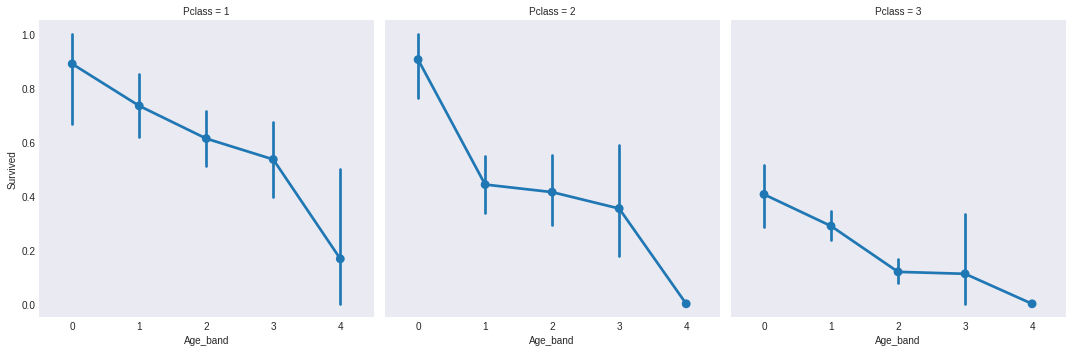

In [57]:
sns.factorplot('Age_band', 'Survived', data = data, col = 'Pclass')
plt.show()

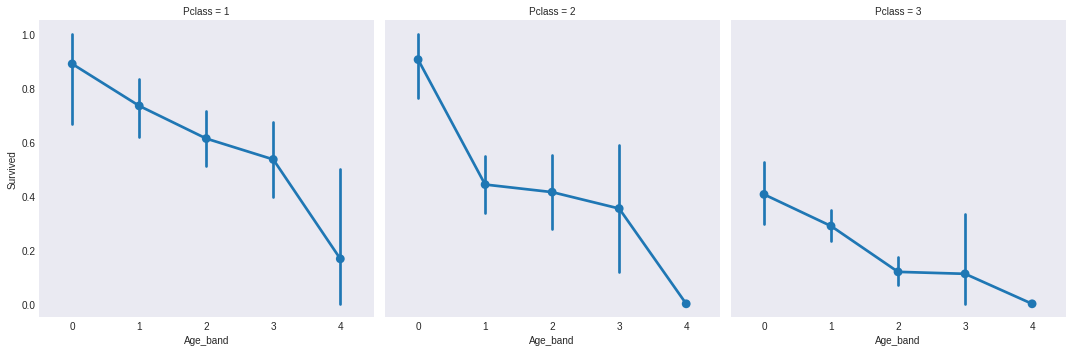

In [58]:
sns.catplot('Age_band', 'Survived', data = data, col = 'Pclass', kind = 'point')
plt.show()

### Family_Size and Alone

In [59]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

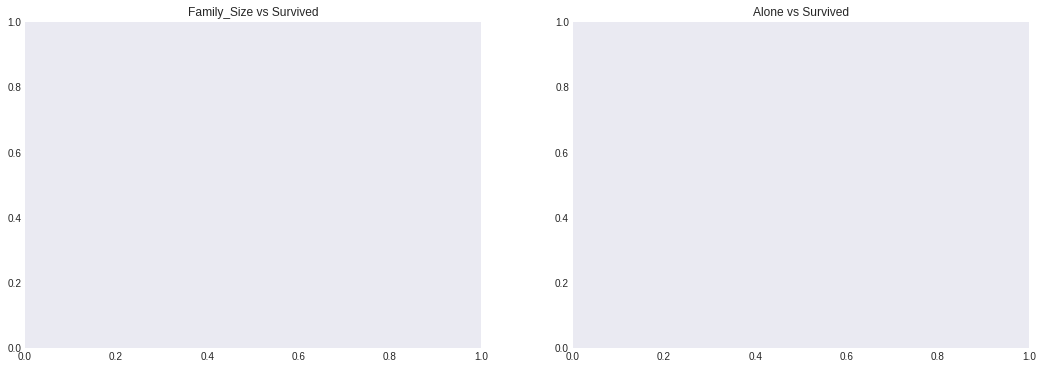

In [60]:
fig, axes = plt.subplots(1, 2, figsize = (18,6))
sns.factorplot('Family_Size','Survived', data = data, ax = axes[0])
axes[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone', 'Survived', data = data, ax = axes[1])
axes[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

안나오니 factorplot 대신 다른 것들을 사용해봅시다.

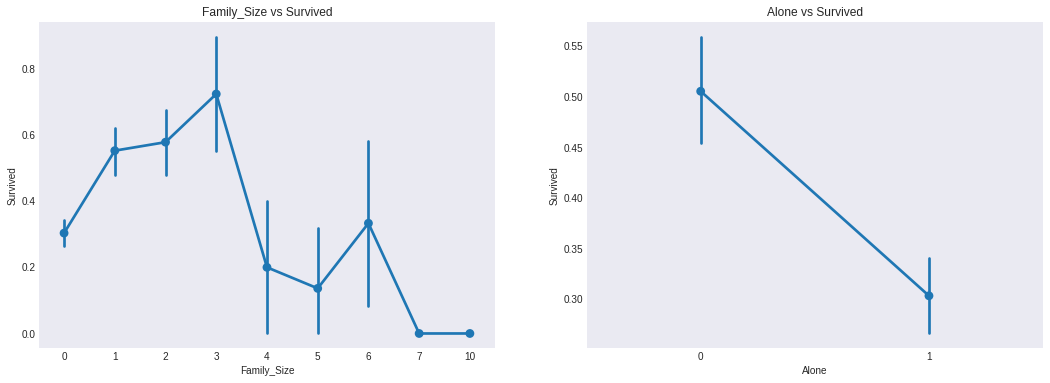

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (18,6))
sns.pointplot('Family_Size','Survived', data = data, ax = axes[0])
axes[0].set_title('Family_Size vs Survived')
sns.pointplot('Alone', 'Survived', data = data, ax = axes[1])
axes[1].set_title('Alone vs Survived')
plt.show()

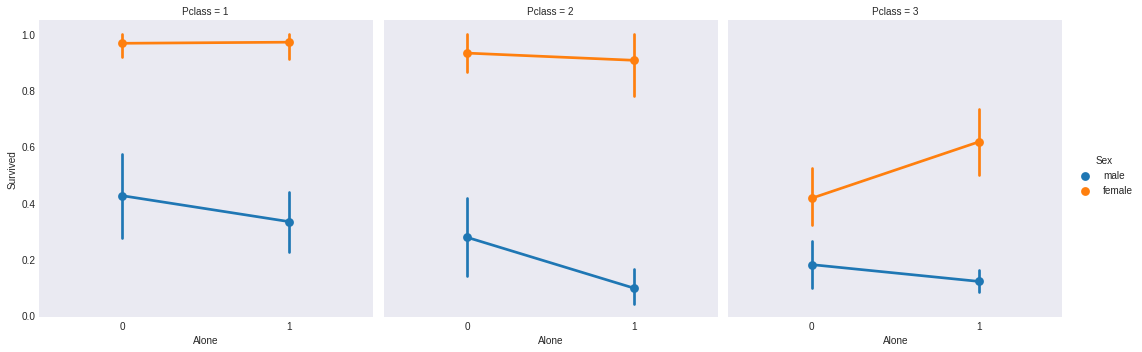

In [62]:
sns.factorplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass')
plt.show()

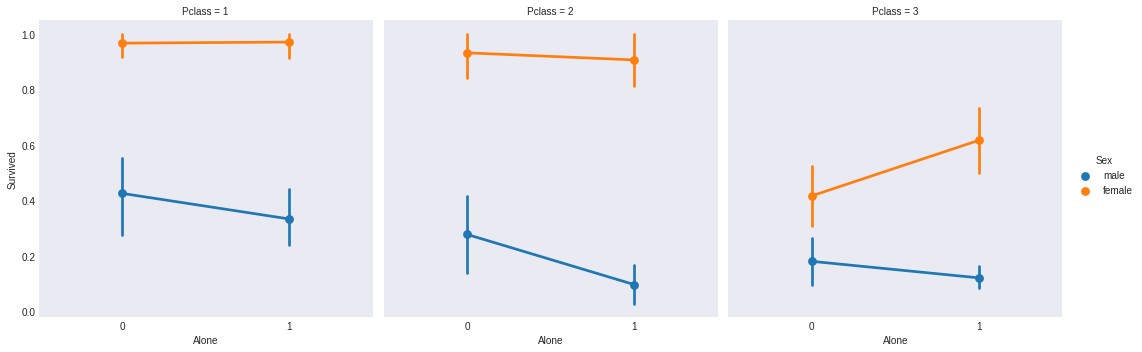

In [63]:
sns.catplot('Alone', 'Survived', data = data, hue = 'Sex', col = 'Pclass', kind = 'point')
plt.show()

### Fare_Range

<AxesSubplot:ylabel='Fare'>

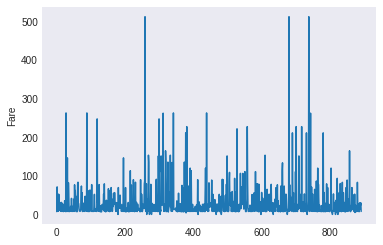

In [64]:
sns.lineplot(data = data['Fare'])

In [65]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [66]:
data['Fare_Range'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: Fare_Range, dtype: int64

* Fare = 요금
* [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
* 받은 개수대로 동일한 길이만큼 구간을 나눠서 카테고리 데이터를 만들어주고 각 값마다 지정하는 함수입니다.
* 요금을 4개로 나눠서 저장한 뒤, 해당 열을 group으로 잡고 suvived에 대한 평균값을 나타내는  
  series를 dataframe으로 만들고 배경색을 넣음

In [67]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 513), 'Fare_cat'] = 3

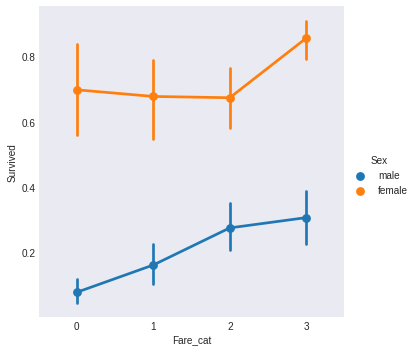

In [68]:
sns.factorplot('Fare_cat', 'Survived', data = data, hue = 'Sex')
plt.show()

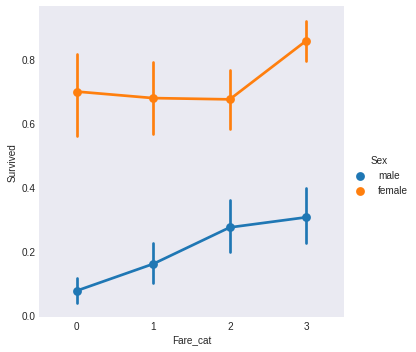

In [69]:
sns.catplot('Fare_cat', 'Survived', data = data, hue='Sex', kind = 'point')
plt.show()

### Converting String Values into Numeric

In [70]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0, 1, 2, 3, 4], inplace = True)

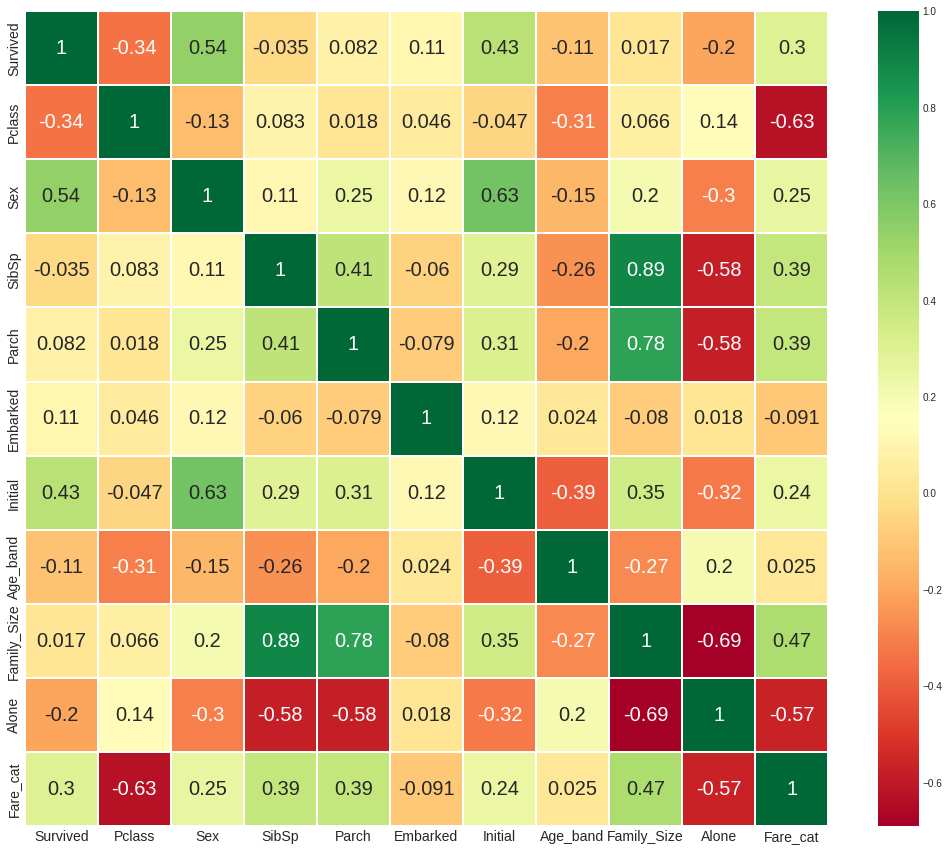

In [71]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis = 1, inplace = True)
plt.figure(figsize = (18,15))
sns.heatmap(data.corr(), annot = True, cmap= 'RdYlGn', linewidths = 0.2, annot_kws = {'size' : 20})
# fig = plt.gcf()
# fig.set_size_inches(18,15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

* annot_kws : annot = True 일 때, [matplotlib.axes.Axes.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text)의 keyword argument
* 간단하게 annot와 관련된 여러 파라미터 설정

### Part3: Predictive Modeling

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

* 각 모델의 사용 코드 셀에서 설명을 추가하겠습니다.

In [73]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0, stratify = data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

* [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* data를 가지고 train을 70%, test를 30%로 나누고 random_state 값은 0, stratify 는 label class 설정용
* train data들이 target인 Survived column을 가지면 안되기 때문에 slice를 통해 첫번째 열인 Survived를 제거

### Radial Support Vector Machines(rbf-SVM)

In [74]:
model = svm.SVC(kernel = 'rbf', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


* [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svm+svc#sklearn.svm.SVC)
* kernel : 알고리즘에 사용 될 kernel 선택
* C : Regularization 파라미터 - L2 penalty
* gamma : 커널 계수

### Linear Support Vector Machine(linear-SVM)

In [75]:
model = svm.SVC(kernel = 'linear', C = 1, gamma = 0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.7985074626865671


### Logistic Regression

In [76]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [77]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


### K-Nearest Neighbours(KNN)

In [78]:
model = KNeighborsClassifier() 
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


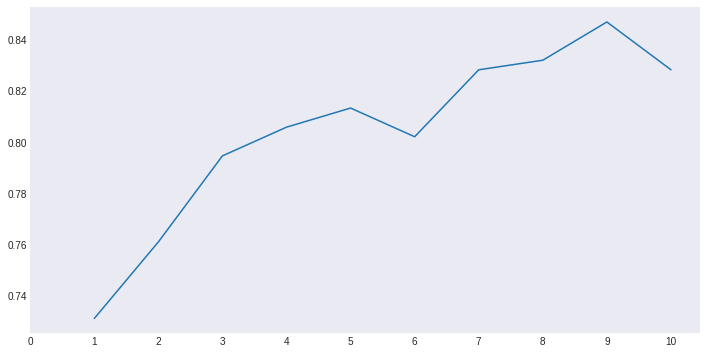

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
0    0.731343
0    0.761194
0    0.794776
0    0.805970
0    0.813433
0    0.802239
0    0.828358
0    0.832090
0    0.847015
0    0.828358
dtype: float64


In [79]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors = i) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.figure(figsize = (12,6))
plt.plot(a_index, a)
plt.xticks(x)
# fig=plt.gcf()
# fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())
print(a_index)
print(a)

* KNN 에서 neightbor 개수를 늘려가면서 나오는 prediction 값들을 그래프로 표현하였습니다.

### Gaussian Naive Bayes

In [80]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


* [sklearn.naive_bayes: Naive Bayes](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [베이즈 정리(Bayesian rule)](https://datascienceschool.net/02%20mathematics/06.06%20%EB%B2%A0%EC%9D%B4%EC%A6%88%20%EC%A0%95%EB%A6%AC.html)에 기반한 머신 러닝 알고리즘 입니다.

<img src = "data/NaiveBayes.png" width = 50% height = 50%>

* 이진속성은 주로 [BernoulliNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)를 사용하고 연속성을 가지는 데이터에는 [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)를 적용합니다.

### Random Forests

In [81]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


## Cross Validation

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# kfold = KFold(n_splits = 10, random_state = 22)
kfold = KFold(n_splits = 10)
xyz = []
accuracy = []
std = []

classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors = 9),
        DecisionTreeClassifier(),
        GaussianNB(),
        RandomForestClassifier(n_estimators = 100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv = kfold, scoring = "accuracy")
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
    
new_models_dataframe2 = pd.DataFrame({'CV Mean':xyz,'Std':std}, index = classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.810424,0.045010
Decision Tree,0.804757,0.027698
Naive Bayes,0.801386,0.028999
Random Forest,0.814856,0.033518


* [sklearn.model_selection.KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
* random_state가 오류가 나서 default 값으로 두었습니다.
* 10개로 나누어서 모든 모델에서 k fold를 진행합니다.
* 진행할때마다 mean, std, accuray를 입력받고 모델 이름을 index로 하는 데이터프레임을 만듭니다.

In [83]:
box = pd.DataFrame(accuracy, index = [classifiers])
box

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
Radial Svm,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
Logistic Regression,0.800000,0.820225,0.775281,0.820225,0.786517,0.786517,0.797753,0.797753,0.865169,0.808989
KNN,0.722222,0.842697,0.752809,0.853933,0.820225,0.831461,0.820225,0.775281,0.876404,0.808989
Decision Tree,0.766667,0.831461,0.786517,0.820225,0.808989,0.764045,0.820225,0.775281,0.842697,0.831461
Naive Bayes,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
Random Forest,0.777778,0.831461,0.764045,0.820225,0.842697,0.808989,0.808989,0.775281,0.876404,0.842697


<AxesSubplot:>

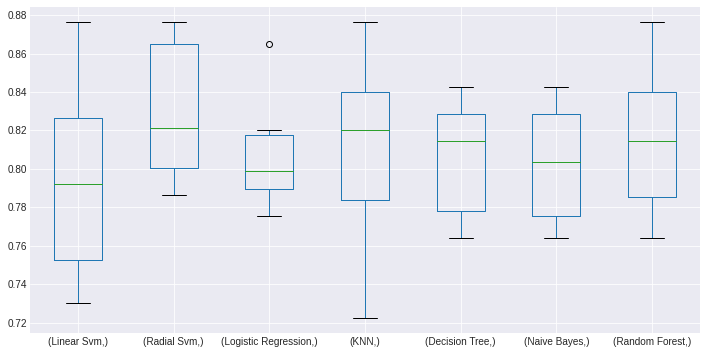

In [84]:
plt.subplots(figsize = (12,6))
box.T.boxplot()

* [pandas.DataFrame.boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)
* pandas의 boxplot으로 표현합니다. 살펴보니 matplotlib boxplot 을 상속받네요
* X축을 모델로 표현하기 위해 box를 전치하여 사용합니다.
* seaborn을 활용해 다른 그래프들도 표현해보겠습니다.

In [85]:
display(box)
display(box.T)

print(box.shape)
print(box.T.shape)

,0,1,2,3,4,5,6,7,8,9
Linear Svm,0.811111,0.831461,0.752809,0.876404,0.775281,0.808989,0.741573,0.730337,0.853933,0.752809
Radial Svm,0.822222,0.876404,0.786517,0.876404,0.808989,0.820225,0.797753,0.786517,0.876404,0.831461
Logistic Regression,0.800000,0.820225,0.775281,0.820225,0.786517,0.786517,0.797753,0.797753,0.865169,0.808989
KNN,0.722222,0.842697,0.752809,0.853933,0.820225,0.831461,0.820225,0.775281,0.876404,0.808989
Decision Tree,0.766667,0.831461,0.786517,0.820225,0.808989,0.764045,0.820225,0.775281,0.842697,0.831461
Naive Bayes,0.766667,0.764045,0.786517,0.831461,0.775281,0.831461,0.820225,0.775281,0.842697,0.820225
Random Forest,0.777778,0.831461,0.764045,0.820225,0.842697,0.808989,0.808989,0.775281,0.876404,0.842697


,Linear Svm,Radial Svm,Logistic Regression,KNN,Decision Tree,Naive Bayes,Random Forest
0,0.811111,0.822222,0.800000,0.722222,0.766667,0.766667,0.777778
1,0.831461,0.876404,0.820225,0.842697,0.831461,0.764045,0.831461
2,0.752809,0.786517,0.775281,0.752809,0.786517,0.786517,0.764045
3,0.876404,0.876404,0.820225,0.853933,0.820225,0.831461,0.820225
4,0.775281,0.808989,0.786517,0.820225,0.808989,0.775281,0.842697
5,0.808989,0.820225,0.786517,0.831461,0.764045,0.831461,0.808989
6,0.741573,0.797753,0.797753,0.820225,0.820225,0.820225,0.808989
7,0.730337,0.786517,0.797753,0.775281,0.775281,0.775281,0.775281
8,0.853933,0.876404,0.865169,0.876404,0.842697,0.842697,0.876404
9,0.752809,0.831461,0.808989,0.808989,0.831461,0.820225,0.842697


(7, 10)
(10, 7)


boxplot 말고 다른 것들도 해보겠습니다.

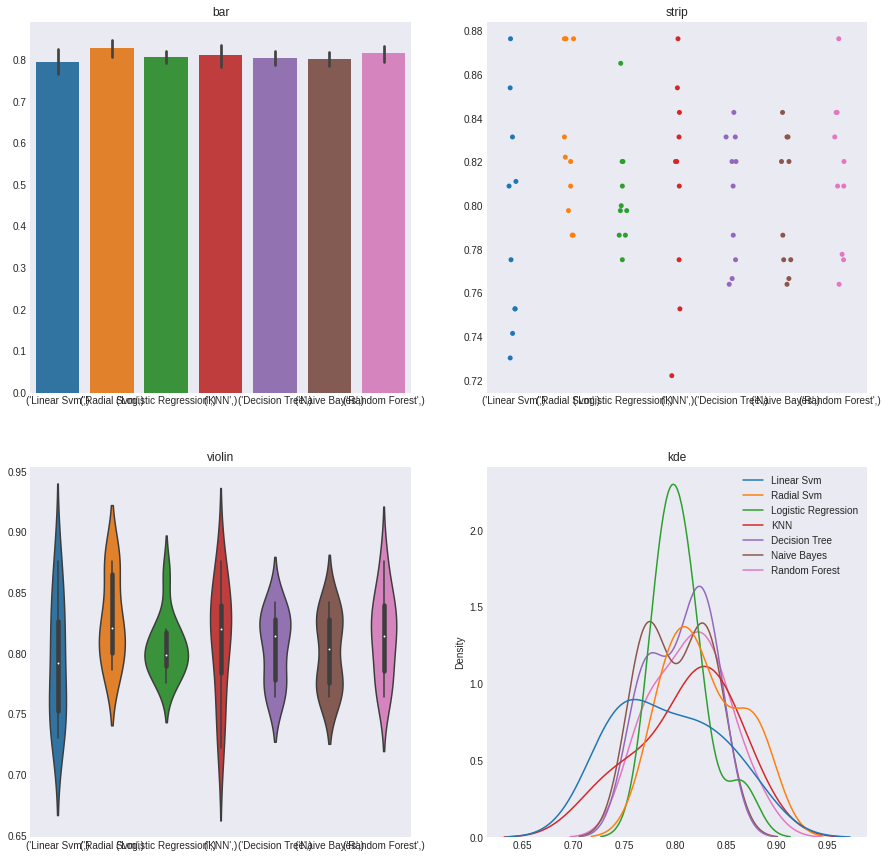

In [86]:
graph_name = ['bar', 'strip', 'violin', 'kde']
fig, axes = plt.subplots(2, 2, figsize = (15,15))
axes = axes.flatten()
sns.barplot(data = box.T, ax = axes[0])
sns.stripplot(data = box.T, ax = axes[1])
sns.violinplot(data = box.T, ax = axes[2])
sns.kdeplot(data = box.T, ax = axes[3])

for i, ax in enumerate(axes):
    ax.set_title(graph_name[i])
plt.show()

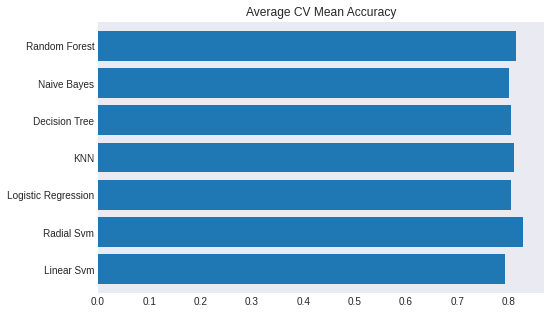

In [87]:
plt.figure(figsize = (8,5))
new_models_dataframe2['CV Mean'].plot.barh(width = 0.8)
plt.title('Average CV Mean Accuracy')
# fig = plt.gcf()
# fig.set_size_inches(8,5)
plt.show()

## Confusion Matrix

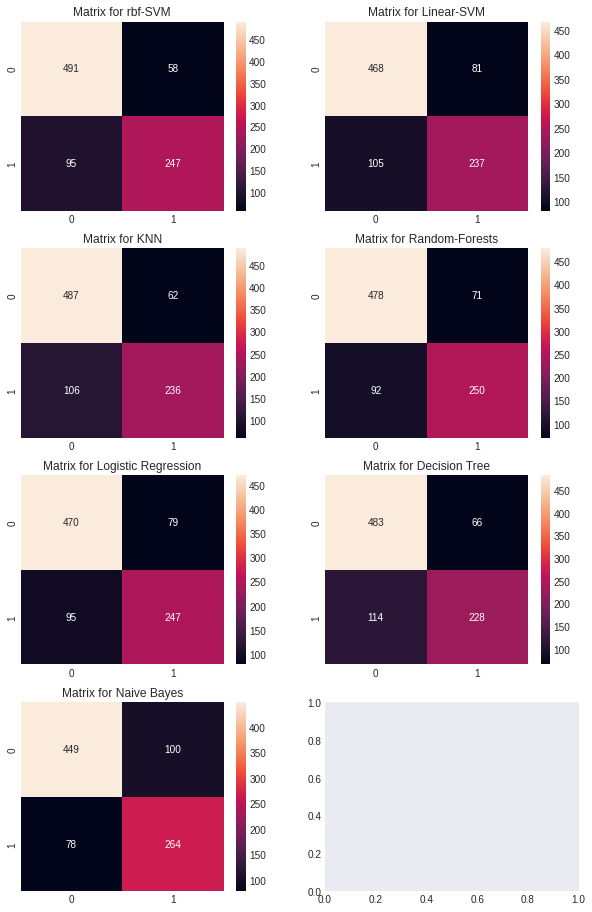

In [88]:
fig, ax = plt.subplots(4, 2, figsize = (10,16))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')

ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')

ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')

ax[1,0].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')

ax[1,1].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')

ax[2,0].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')

ax[2,1].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[3,0],annot=True,fmt='2.0f')

ax[3,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

* 각 모델에 대한 confusion matrix를 heatmap으로 표현합니다.
* fmf : annot 용 string format

## Hyper-Parameters Tuning

### SVM

In [89]:
from sklearn.model_selection import GridSearchCV
C = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel = ['rbf', 'linear']
hyper = {'kernel' : kernel, 'C' : C, 'gamma' : gamma}
gd = GridSearchCV(estimator=svm.SVC(), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


* [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* SVM 모델의 kernel, C, gamma 초매개변수를 gridsearch 합니다.

### Random Forests

In [90]:
n_estimators = range(100, 1000, 100)
hyper={'n_estimators':n_estimators}
gd = GridSearchCV(estimator = RandomForestClassifier(random_state = 0), param_grid = hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


## Ensembling

### Voting Classifier

In [91]:
from sklearn.ensemble import VotingClassifier

ensemble_lin_rbf = VotingClassifier(estimators = [('KNN', KNeighborsClassifier(n_neighbors = 10)),
                                                  ('RBF', svm.SVC(probability = True, kernel = 'rbf', C = 0.5, gamma = 0.1)),
                                                  ('RFor', RandomForestClassifier(n_estimators = 500, random_state = 0)),
                                                  ('LR', LogisticRegression(C = 0.05)),
                                                  ('DT', DecisionTreeClassifier(random_state = 0)),
                                                  ('NB', GaussianNB()),
                                                  ('svm', svm.SVC(kernel = 'linear', probability = True))
                                                  ], voting = 'soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8171641791044776
The cross validated score is 0.8249188514357053


* [sklearn.ensemble.VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
* 다수결로 분류, hard : 단순 누가 더 많이, soft : 각 모델의 클래스 별 확률을 적용함(가중치 투표)

### Bagging

#### Bagged KNN

In [92]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(base_estimator = KNeighborsClassifier(n_neighbors = 3), random_state = 0, n_estimators = 700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


* [sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
* Bagging은 하나의 모델이 서로 다른 결과를 나타내도록 엄청나게 많이 생성하는 방법

#### Bagged DecisionTree

In [93]:
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state = 0, n_estimators = 100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result = cross_val_score(model, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


### Boosting

#### AdaBoost(Adaptive Boosting)

In [94]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.1)
result = cross_val_score(ada, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


* [sklearn.ensemble.AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* 앞에서 학습된 모델을 보완해 나가면서 더 나은 모델로 학습시킴
* 간단한 분류기들이 상호보완 하도록 단계적으로 학습, 조합하여 성능을 올림

#### Stochastic Gradient Boosting

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators = 500, random_state = 0, learning_rate = 0.1)
result = cross_val_score(grad, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


* [sklearn.ensemble.GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)

#### XGBoost

In [96]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators = 900, learning_rate = 0.1)
result = cross_val_score(xgboost, X, Y, cv = 10, scoring = 'accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


[xgboost](https://xgboost.readthedocs.io/en/stable/)

#### Hyper-Parameter Tuning for AdaBoost

In [97]:
n_estimators = list(range(100, 1100, 100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators' : n_estimators, 'learning_rate' : learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyper, verbose = True)
gd.fit(X, Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### Confusion Matrix for the Best Model

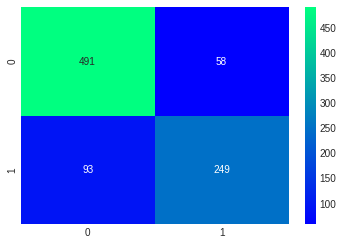

In [98]:
ada = AdaBoostClassifier(n_estimators = 200, random_state = 0, learning_rate = 0.05)
result = cross_val_predict(ada, X, Y, cv = 10)
sns.heatmap(confusion_matrix(Y, result), cmap = 'winter', annot = True, fmt = '2.0f')
plt.show()

## Feature Importance

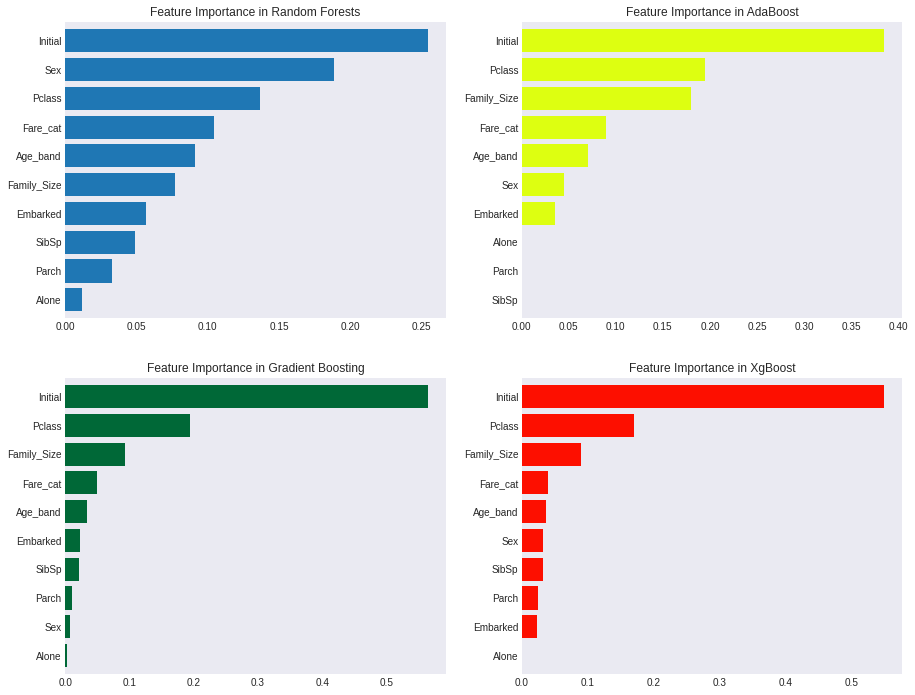

In [99]:
fig ,ax = plt.subplots(2, 2, figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

* 각 모델 별로 feature importance를 출력합니다.